# Presentation and Visualization Dashboard: Adults Dataset


Ilaria Curzi, Georgia Zavou, Alana Zoloeva

To commence our examination of the "Adults" dataset, we will read the data from the following website: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data, hosted by the University of California, Irvine.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
from scipy.stats import pointbiserialr
import numpy as np
from scipy.stats import pointbiserialr
from scipy.stats.contingency import association

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [35]:
# Load the dataset
url = "/content/drive/MyDrive/Colab Notebooks/Visualization/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]
df = pd.read_csv(url, names=column_names, sep=",\s*", engine="python",na_values='?')

df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


## Part1: Exploratory data analysis

### (a) Describe the data
Firstly, we look at descriptive statistics of our data.

In [37]:
description = df.describe()


description.style.set_caption("Data Description").set_properties(**{
    'background-color': '#d3d3d3',
    'color': 'black',
    'border-color': 'black'
})


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


In [38]:
data_info = {
    "Non-Null Count": df.count(),
    "Data Type": df.dtypes,
    "Unique Values": [df[col].nunique() for col in df.columns],
    "Missing Values": [df[col].isnull().sum() for col in df.columns]
}


info_df = pd.DataFrame(data_info)
info_df.style.set_caption("Data Information").set_properties(**{
    'background-color': '#d3d3d3',
    'color': 'black',
    'border-color': 'black'
})

,Non-Null Count,Data Type,Unique Values,Missing Values
age,32561,int64,73,0
workclass,30725,object,8,1836
fnlwgt,32561,int64,21648,0
education,32561,object,16,0
education_num,32561,int64,16,0
marital_status,32561,object,7,0
occupation,30718,object,14,1843
relationship,32561,object,6,0
race,32561,object,5,0
sex,32561,object,2,0


In [39]:
# Remove rows with missing values
df = df.dropna()


data_info = {
    "Non-Null Count": df.count(),
    "Missing Values": [df[col].isnull().sum() for col in df.columns]
}


info_df = pd.DataFrame(data_info)
info_df.style.set_caption("Data Information").set_properties(**{
    'background-color': '#d3d3d3',
    'color': 'black',
    'border-color': 'black'
})

,Non-Null Count,Missing Values
age,30162,0
workclass,30162,0
fnlwgt,30162,0
education,30162,0
education_num,30162,0
marital_status,30162,0
occupation,30162,0
relationship,30162,0
race,30162,0
sex,30162,0


Now we plot the distribution of each column using  histograms and density plots.

#### Numerical features

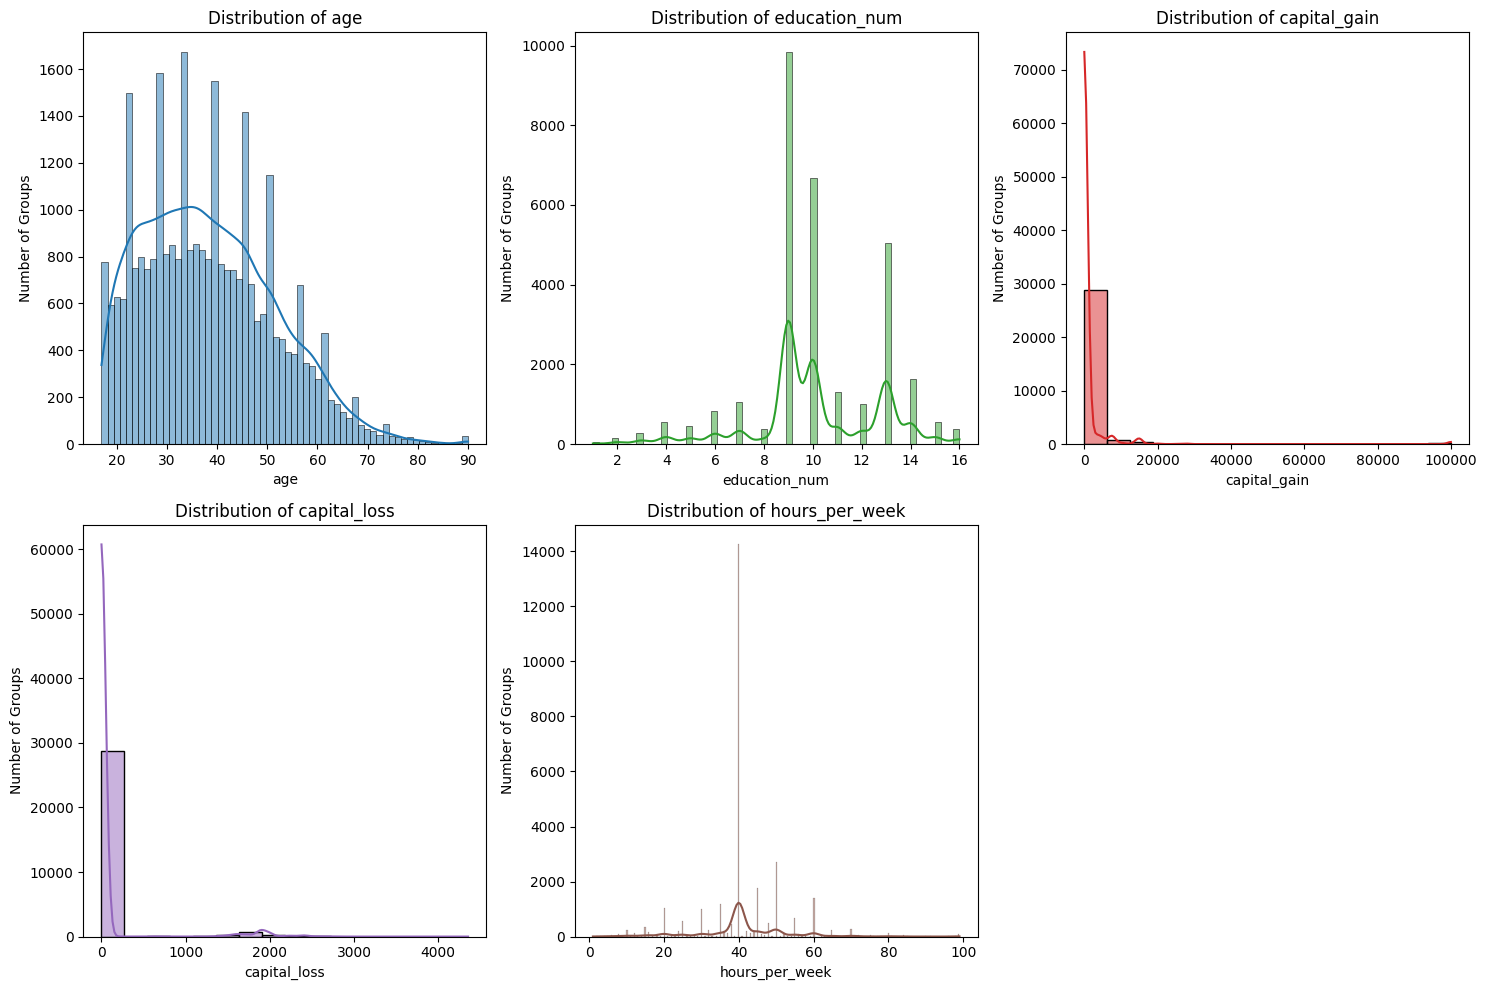

In [40]:
# Data Distribution
# List of numerical features
numerical_features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create the subplots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, color=colors[i-1])
    plt.title(f"Distribution of {feature}")
    plt.ylabel("Number of Groups")

plt.tight_layout()
plt.show()


We now describe the most important columns.

1. Age Distribution:
      - Histogram: The age distribution shows a slight right skew, with a peak occurring in the mid-30s. This indicates that the most prevalent age group in our sample is in their 30s.
      - Density Plot: The density plot further reinforces the right-skewed distribution of ages, offering a smoother view of the data's spread.

2. Hours per Week Distribution:
      - Histogram: The distribution of weekly working hours appears to follow a near-normal pattern, with the highest frequency around 40 hours, which aligns with the typical workweek for full-time employees.
      - Density Plot: The density plot confirms the normal distribution, with a distinct peak at 40 hours per week.

3. Distribution of Educational Number (years of schooling):
      - Histogram: The distribution of years of schooling is not normal. It has 2 peaks: 9 and 13 years of studies, which probably means finishing school and high school/university
      - Density plot: The density plot also shoes that the most common values for years of studies are 9, 10 and 13

Now we will just check if the Distribution is affected when we multiply the column fnlwgt which interpret as the number of people represented by this row to the rest of the columns.

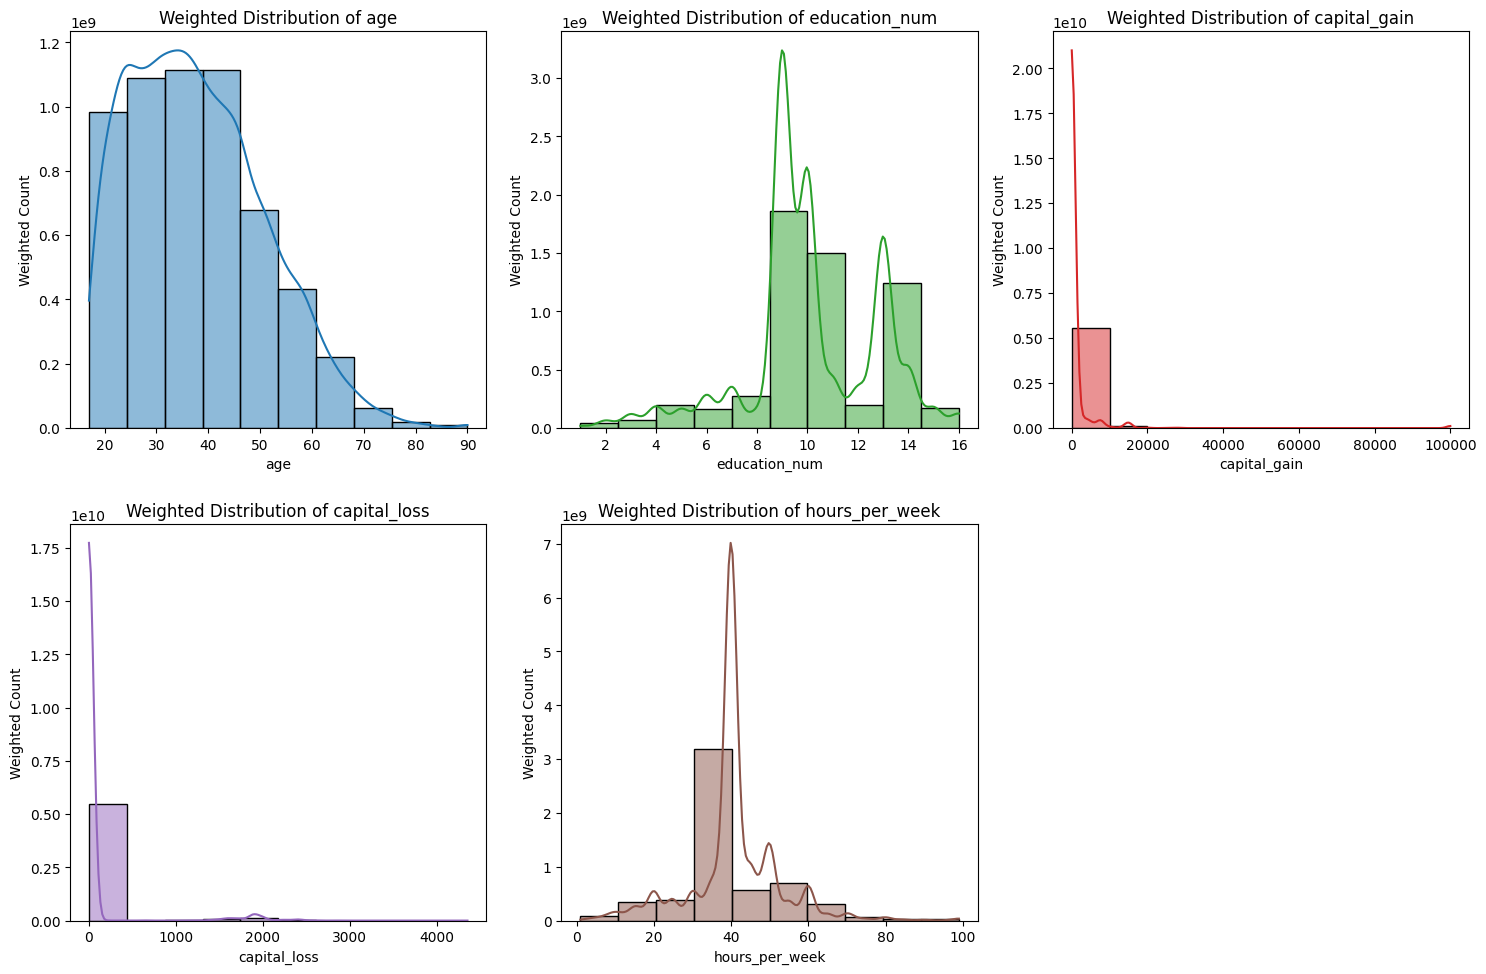

In [41]:
warnings.filterwarnings("ignore")
numerical_features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b']


plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)

    # Weighted distribution, where values of the numerical variable are multiplied by the group size
    sns.histplot(data=df, x=feature, weights=df['fnlwgt'], kde=True, color=colors[i-1])

    plt.title(f"Weighted Distribution of {feature}")
    plt.ylabel("Weighted Count")

plt.tight_layout()
plt.show()


**Outliers**

Here we use BoxPlots to spot Ouliers in the Numerical Columns

> Add blockquote





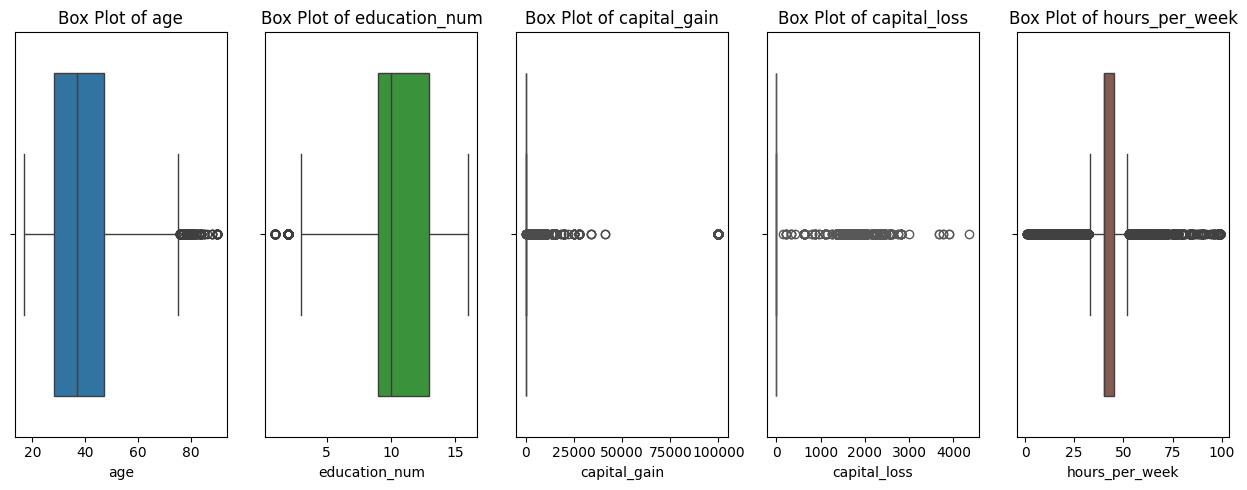

In [42]:
# Outliers

numerical_features = ['age',  'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Custom color list (you can change or expand this as needed)
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create the subplots
plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 6, i)
    sns.boxplot(x=feature, data=df, color=colors[i-1])  # Assign a color from the list
    plt.title(f"Box Plot of {feature}")

plt.tight_layout()
plt.show()


1. Age Outliers: In the age boxplot, we can see that there are some people older than 75-78.
2. Education_num Outliers: There are a few outliers before 5 years indicating people with a low number of years of schooling.
3. Capital_gain and capital_loss - the most frequent values in these columns is 0, that's why they have a lot of outliers.
3. Hours per Week Outliers: There are plenty of outliers in the chart: people working less than 30 hours a week and people working more than 50 hours a week.


We will still analyze capital_gain and capital_loss, as they might have some influenece on income, despite the fact that they contain a lot of outliers.

#### Categorical features

Continuing our analysis, we focus on the categorical features,
"workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country". Let's firstly draw their overall distribution.

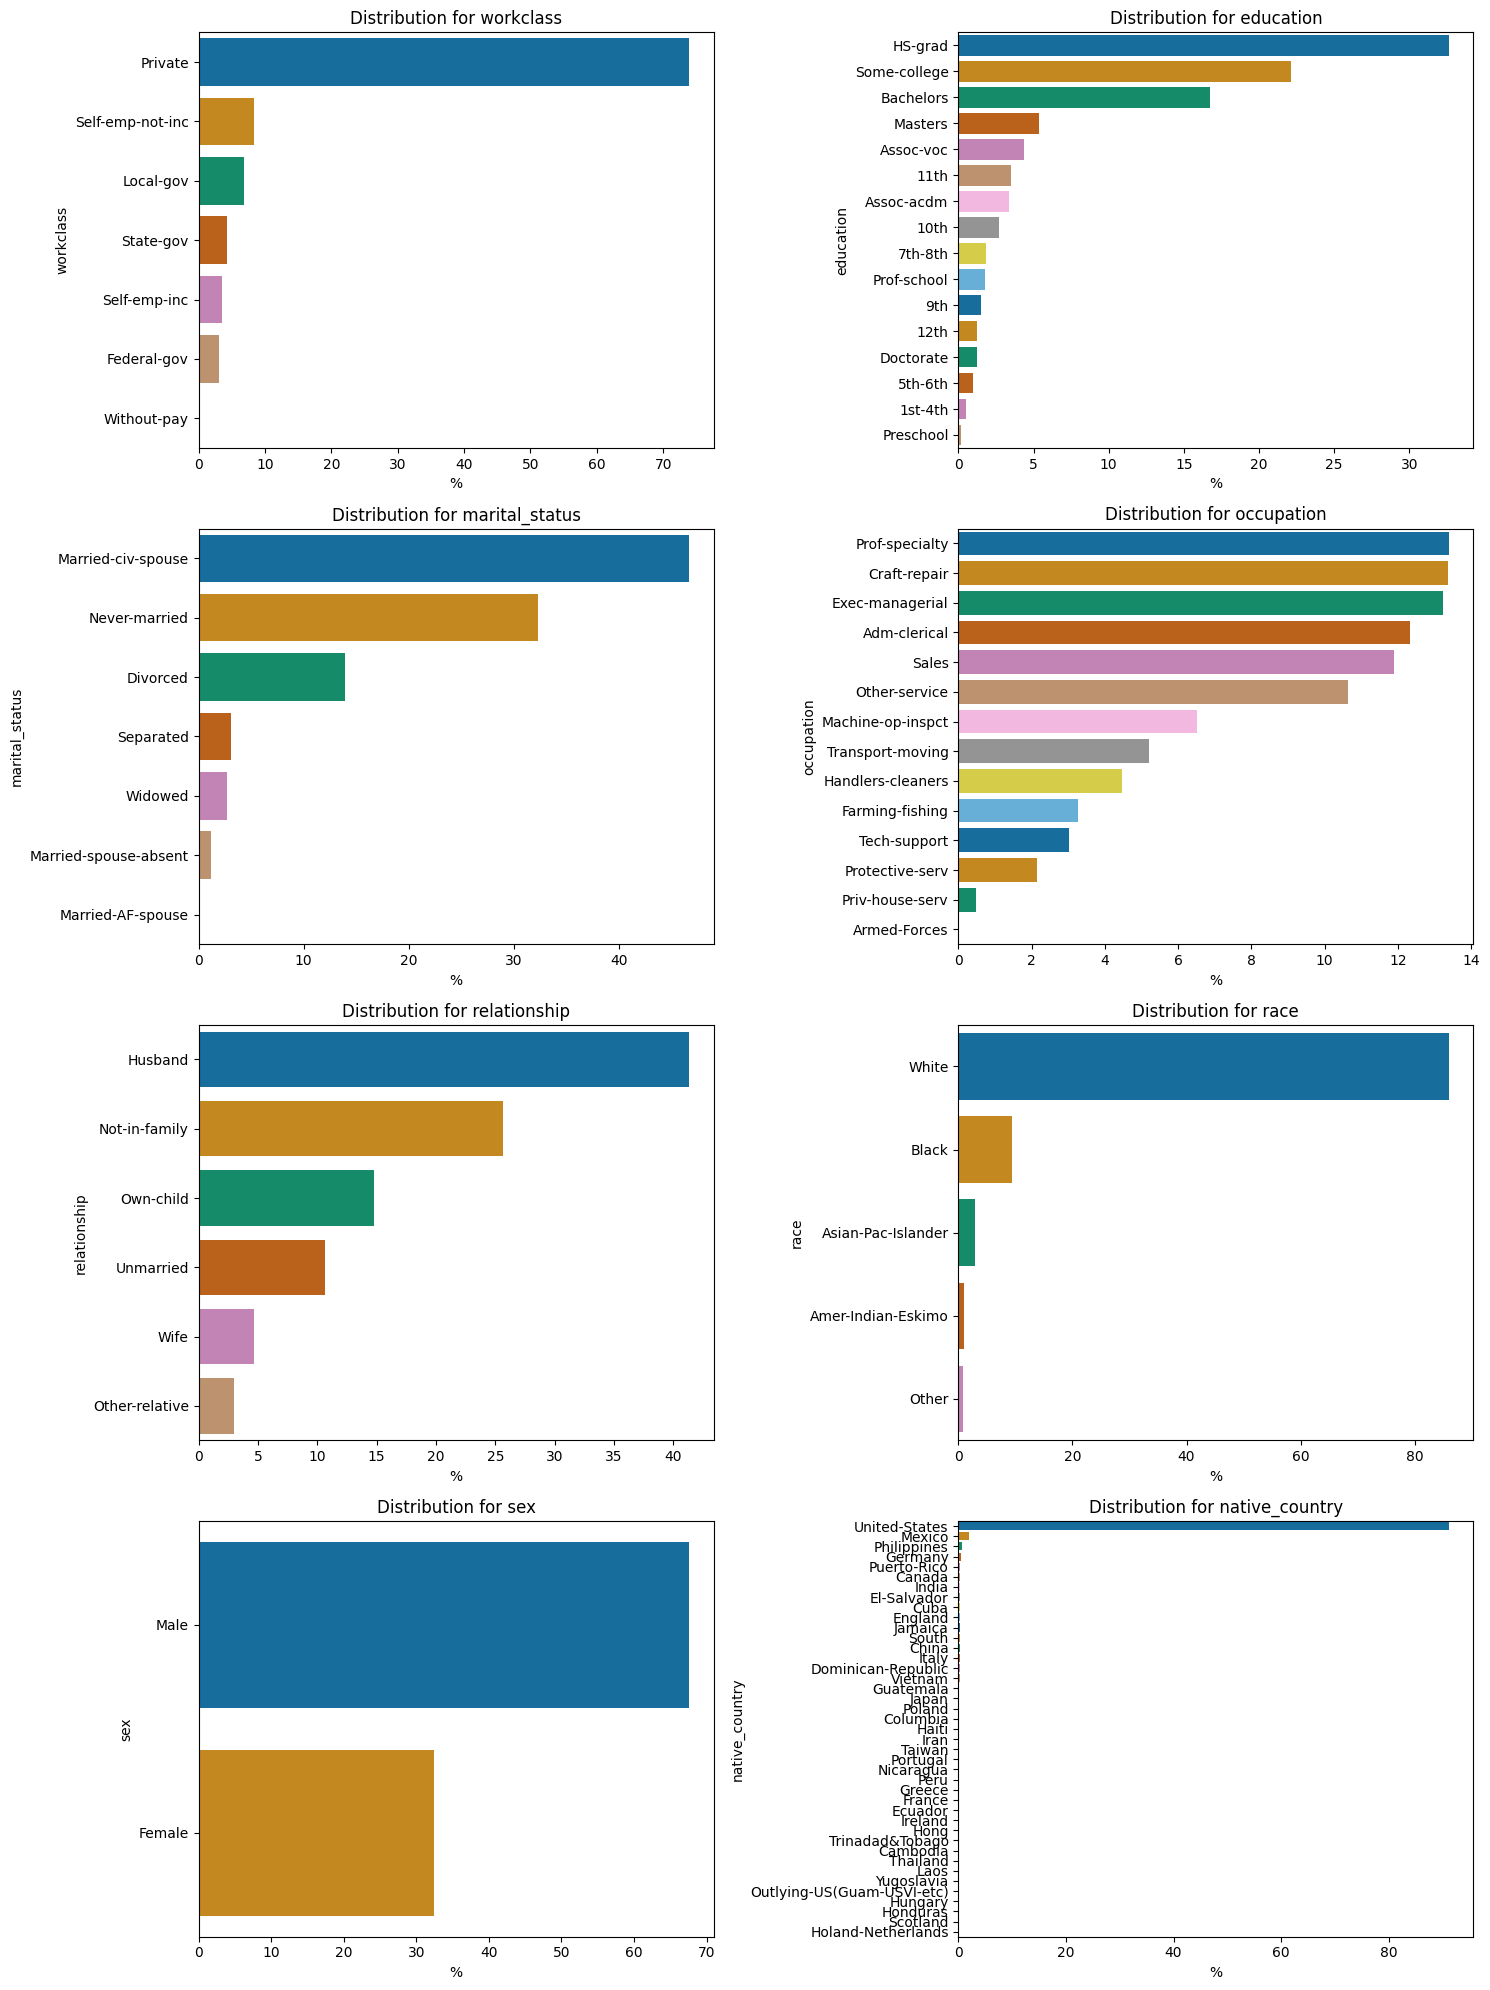

In [43]:
warnings.filterwarnings("ignore")

# List of categorical variables
categorical_columns = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]

# Plot settings
plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)

    # Calculate percentages for each value
    category_percent = (df[column].value_counts(normalize=True) * 100).sort_values(ascending=False)

    # Create the plot
    sns.barplot(x=category_percent, y=category_percent.index, palette="colorblind")
    plt.title(f'Distribution for {column}')
    plt.xlabel("%")
    plt.ylabel(column)

plt.tight_layout()
plt.show()


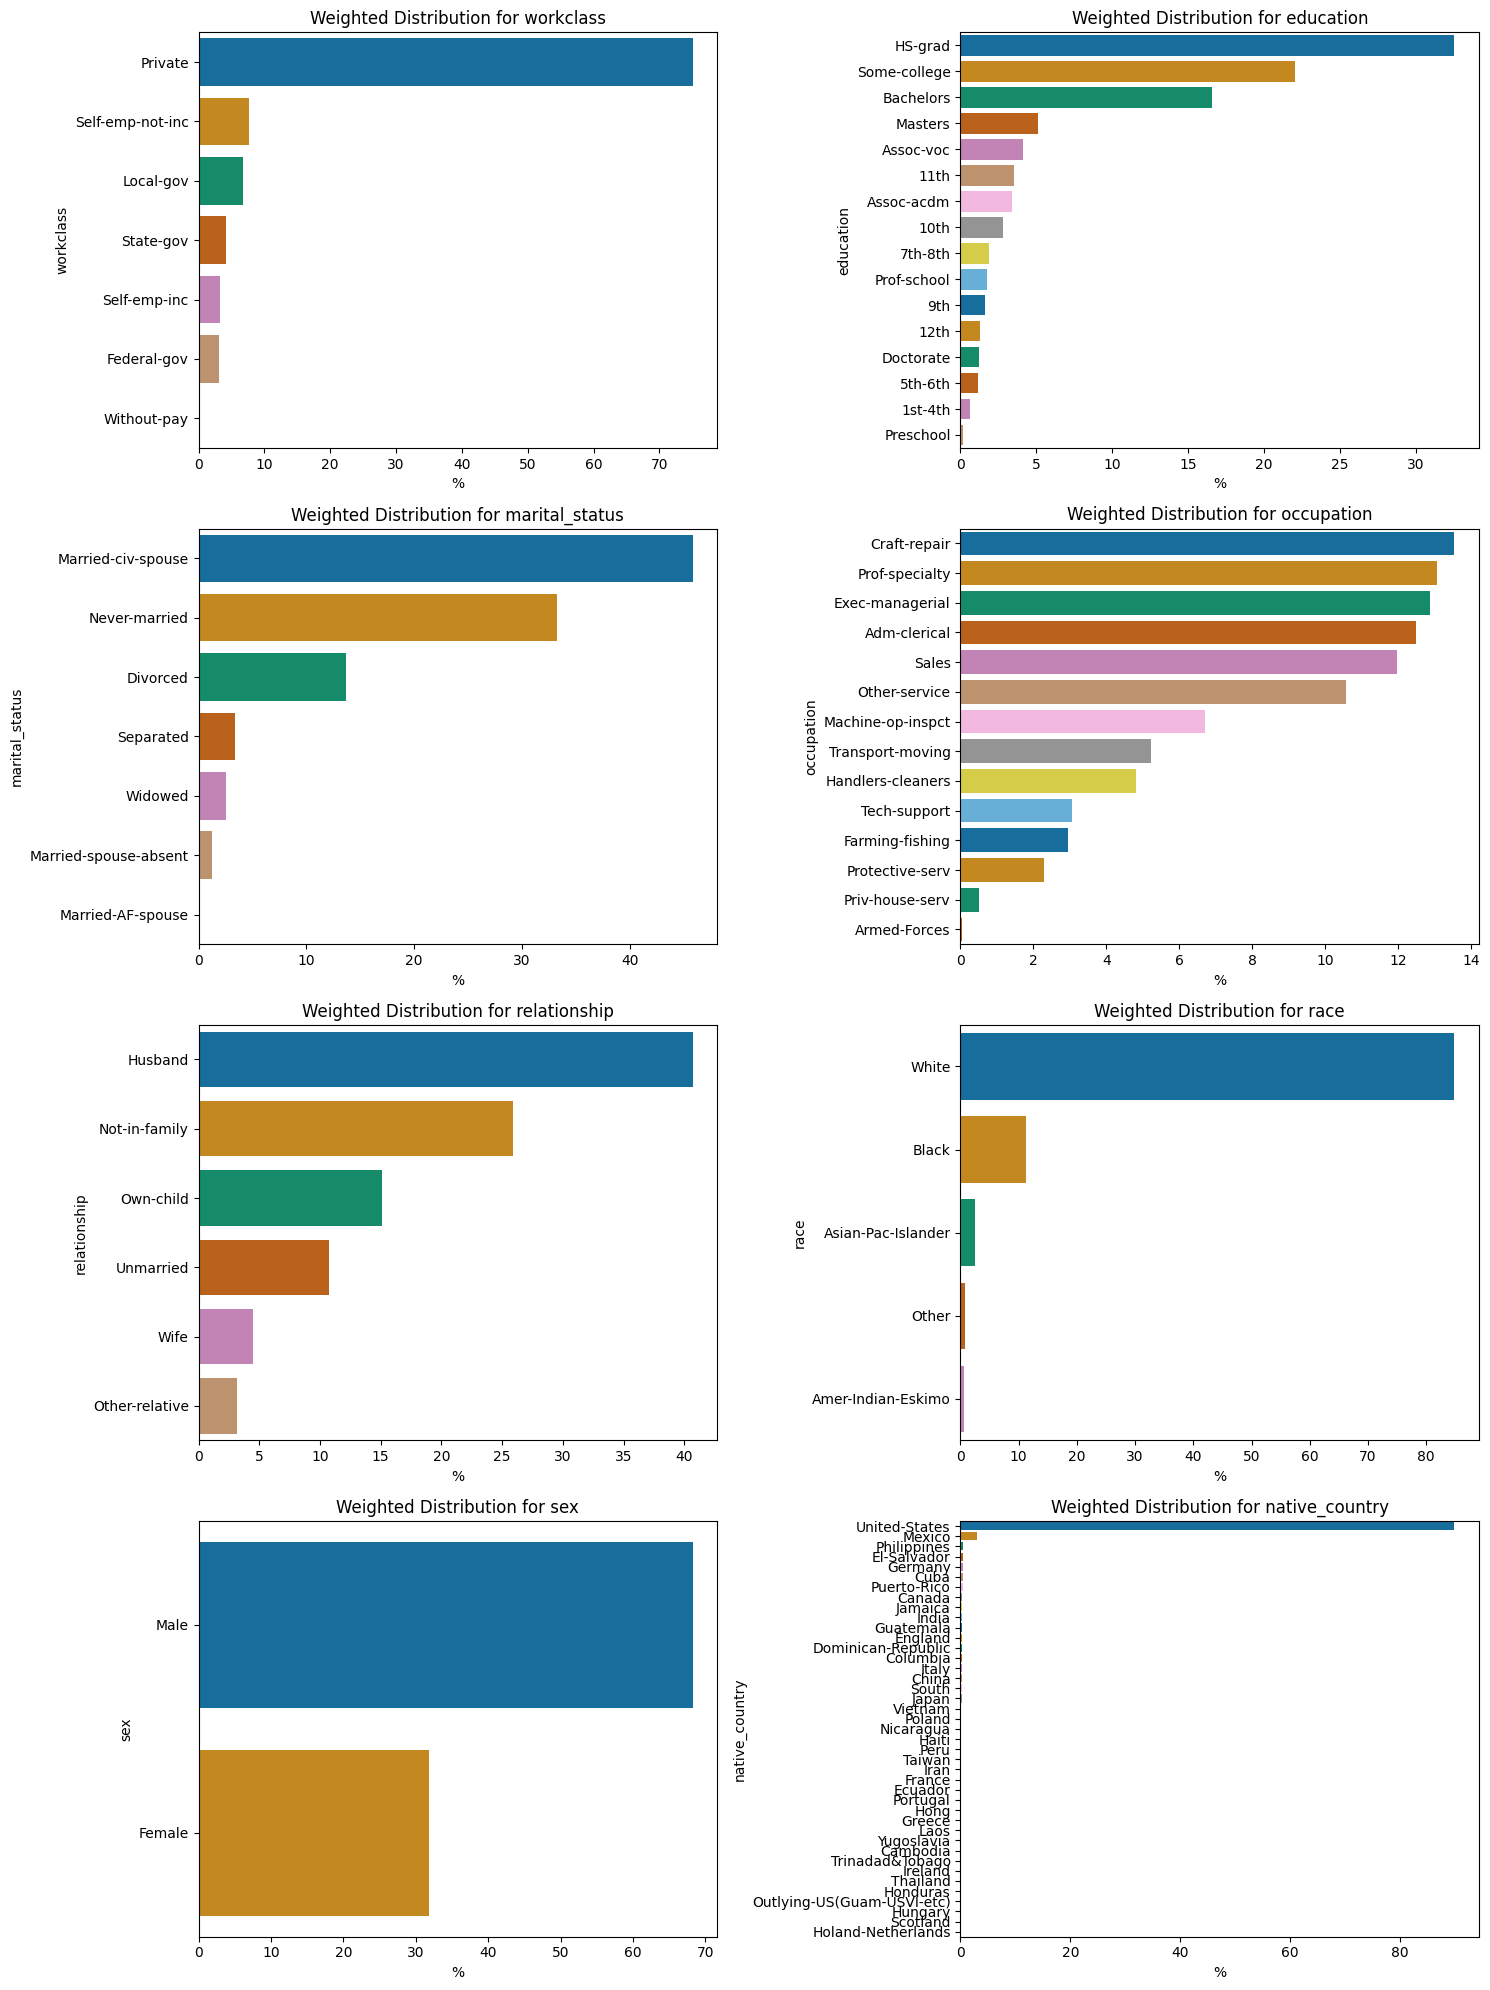

In [44]:
#Here is the weighted percentage. Let's see if it changed.
warnings.filterwarnings("ignore")

# List of categorical variables
categorical_columns = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]

# Plot settings
plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)

    # Calculate weighted percentages for each value
    category_percent = (df.groupby(column)['fnlwgt'].sum() / df['fnlwgt'].sum() * 100).sort_values(ascending=False)

    # Create the plot
    sns.barplot(x=category_percent, y=category_percent.index, palette="colorblind")
    plt.title(f'Weighted Distribution for {column}')
    plt.xlabel("%")
    plt.ylabel(column)

plt.tight_layout()
plt.show()


Now let's look at each column separately.

+ Workclass - the most frequent workclass of our respondents - private, more than 70%
+ Education - this column supports the education_num data, showing that the most common education level of people in the dataset is high school, college and bachelor.
+ Occupations of people in the dataset are diversed. Craft repair, prof-specialty, adm-clerical, exec-managerial, sales, other services have equal percentages (around 10% each)
+ Relationship - 40% of people in the datasets are husbands, while only 5% are wifes. Around 25% are not in family
+ Race - more than 80% of people in the dataset have white race

Other columns will be examined in a more detailed way.

In [45]:
# Get the total number of entries in the dataset
total_entries = len(df)

# Calculate the count and percentage for each marital status
marital_status_counts = df['marital_status'].value_counts()
marital_status_percentages = (marital_status_counts / total_entries) * 100

# Create a DataFrame with the counts and percentages
result_df = pd.DataFrame({
    'Count': marital_status_counts,
    'Percentage': marital_status_percentages
})

# Apply styling to the DataFrame for a better presentation
styled_result_df = result_df.style.set_caption("Marital Status Information") \
    .set_properties(**{
        'background-color': '#d3d3d3',
        'color': 'black',
        'border-color': 'black'
    })

# Print the result with styling
print("Marital Status Counts and Percentages:")
display(styled_result_df)


Marital Status Counts and Percentages:


,Count,Percentage
marital_status,,
Married-civ-spouse,14065,46.631523
Never-married,9726,32.245872
Divorced,4214,13.971222
Separated,939,3.113189
Widowed,827,2.741861
Married-spouse-absent,370,1.226709
Married-AF-spouse,21,0.069624


The "marital_status" column offers a representative sampling of the overall population of the United States, with almost majority of people married, around 32% - never married, and 14% divorced. It will be beneficial to keep this column in our analysis and see the relations with income and marital status.

In [46]:
# Get the total number of entries in the dataset
total_entries = len(df)

# Calculate the count and percentage for each sex
gender_counts = df['sex'].value_counts()
gender_percentages = (gender_counts / total_entries) * 100

# Create a DataFrame with the counts and percentages
result_df = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percentages
})

# Apply styling to the DataFrame for a better presentation
styled_result_df = result_df.style.set_caption("Gender Information") \
    .set_properties(**{
        'background-color': '#d3d3d3',
        'color': 'black',
        'border-color': 'black'
    })

# Print the result with styling
print("Gender Counts and Percentages:")
display(styled_result_df)


Gender Counts and Percentages:


,Count,Percentage
sex,,
Male,20380,67.568464
Female,9782,32.431536


The gender attribute shows a slight imbalance, with a higher percentage of males compared to females. However, this imbalance is not significant enough to hinder the extraction of meaningful insights from the data.

The "native_country" feature appears to provide a representative sample of the overall U.S. population. Therefore, including this column in our analysis seems advisable. Moreover, grouping people into categories of native US citizens and immigrants may also provide some insights.

Unique countries in the dataset: ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France' 'Guatemala'
 'Italy' 'China' 'South' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


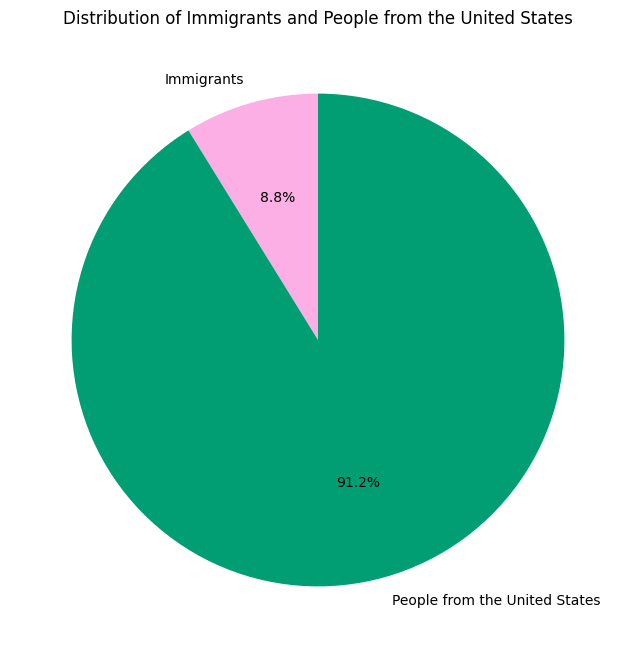

In [47]:
# Get unique values in the 'native_country' column
unique_countries = df['native_country'].unique()
print("Unique countries in the dataset:", unique_countries)

# Get the total number of entries in the dataset
total_entries = len(df)

# Count and calculate the percentage for each country
country_counts = df['native_country'].value_counts()
country_percentages = (country_counts / total_entries) * 100

# Calculate the number of immigrants (excluding United States)
immigrant_count = total_entries - country_counts['United-States']
immigrant_percentage = (immigrant_count / total_entries) * 100

# Calculate the number of people from the United States
us_count = country_counts.get('United-States', 0)  # Handles missing 'United-States' entry
us_percentage = (us_count / total_entries) * 100

# Display country counts and percentages in a DataFrame
result_df = pd.DataFrame({
    'Count': country_counts,
    'Percentage': country_percentages
})

# Create a pie chart to visualize the distribution of immigrants vs US citizens
fig, ax = plt.subplots(figsize=(8, 8))

# Define the labels for the pie chart
labels = ['Immigrants', 'People from the United States']

# Define the values to be plotted
values = [immigrant_percentage, us_percentage]

# Define custom colors for the pie chart
# Generate the colorblind-friendly palette
colorblind_palette = sns.color_palette("colorblind")

# Choose specific colors from the palette
# For example, let's select the first two colors (you can change the indices to select other colors)
colors = [colorblind_palette[6], colorblind_palette[2]]  # The first two colors

# Plot the pie chart with custom colors
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Add a title
ax.set_title('Distribution of Immigrants and People from the United States')

# Show the plot
plt.show()


US citizens count for 91% of all the groups in the dataset, while immigrants are only 9%.

### (b) Identify relations and groupings

First, we will examine the correlations among our features and the "income" column.

In [49]:
# Replace encoded values in the 'income' column, making the integers instead of strings
df['income'] = df['income'].replace({'<=50K': 0,'>50K':1})

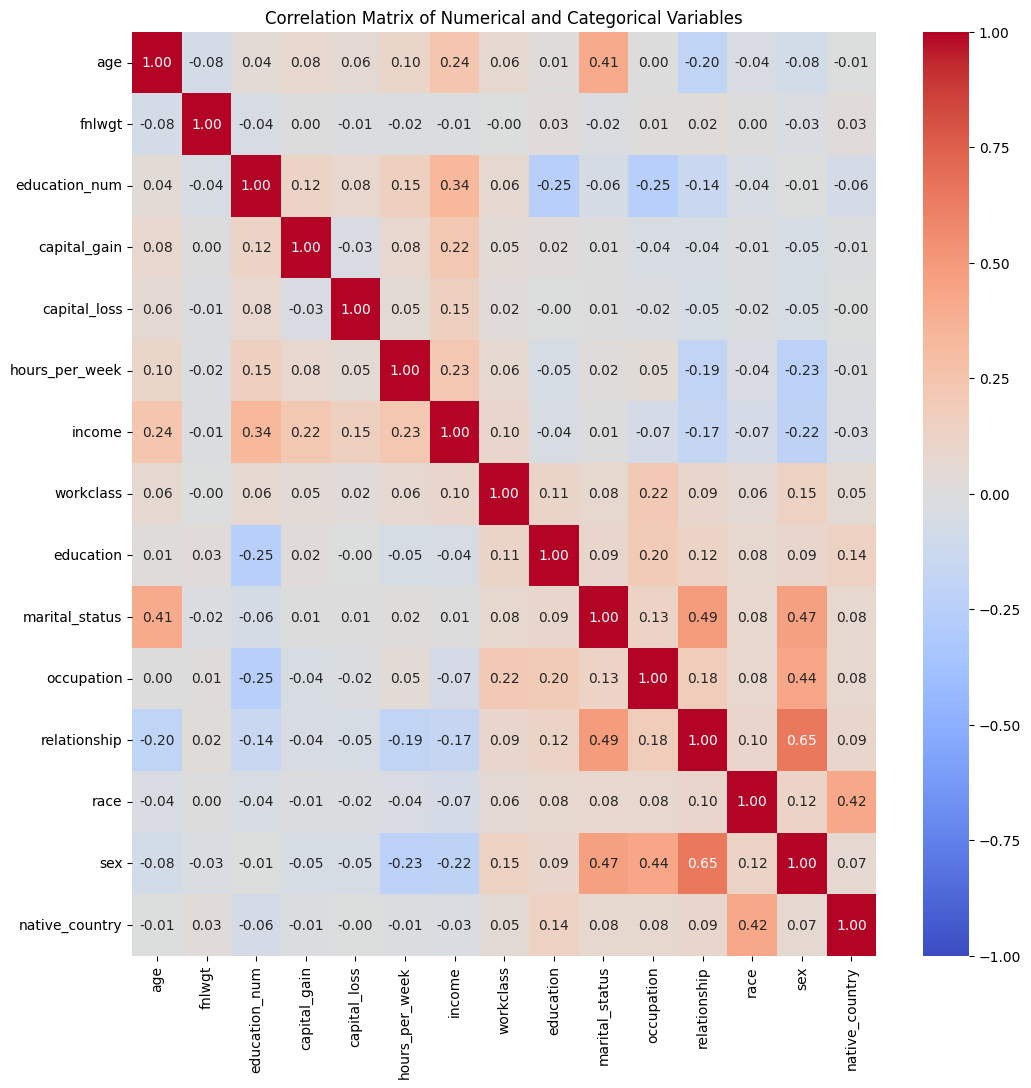

In [50]:
# Step 1: Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Step 2: Encode categorical columns to numeric (Label Encoding)
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = pd.factorize(df[col])[0]  # Label encoding

# Step 3: Initialize the correlation matrix
all_cols = list(numerical_cols) + list(categorical_cols)
correlation_matrix = pd.DataFrame(np.zeros((len(all_cols), len(all_cols))), index=all_cols, columns=all_cols)

# Step 4: Calculate correlations
# Numerical vs Numerical (Pearson)
correlation_matrix.loc[numerical_cols, numerical_cols] = df_encoded[numerical_cols].corr()

# Numerical vs Categorical (Point-Biserial)
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        corr_value, _ = pointbiserialr(df_encoded[cat_col], df_encoded[num_col])
        correlation_matrix.loc[cat_col, num_col] = corr_value
        correlation_matrix.loc[num_col, cat_col] = corr_value

# Categorical vs Categorical (Cramér's V)
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            cramers_v = association(pd.crosstab(df[col1], df[col2]), method='cramer')
            correlation_matrix.loc[col1, col2] = cramers_v
            correlation_matrix.loc[col2, col1] = cramers_v
        else:
            correlation_matrix.loc[col1, col2] = 1  # Perfect correlation with itself

# Step 5: Plot the correlation matrix
plt.figure(figsize=(12, 12))  # Square plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Step 6: Show the plot
plt.title("Correlation Matrix of Numerical and Categorical Variables")
plt.show()


As shown in the heatmap, correlations among the numerical attributes `"age"`, `"fnlwgt"`, `"education_num"`, `"capital_gain"`, `"capital_loss"`, and `"hours_per_week"` are low.

However, `"age"` appears to have some correlation with `"marital_status"` and `"relationship"`, `"education"` is correlated with `"education_num"`, `"hours_per_week"` with `"sex"` and `"relationship"`, `"workclass"` with `"occupation"`, `"marital_status"` with `"relationship"`, `"age"`, and `"sex"`, `"relationship"` with `"sex"`, and `"race"` with `"native_country"`.

The three most positively correlated attributes with the `"income"` column, in descending order, are `"education_num"`, `"age"`, and `"hours_per_week"`. Negatively correlated with the `"income"` column are `"sex"` and `"relationship"`.

Now let's discover the relations with 'Income" column more precisely.

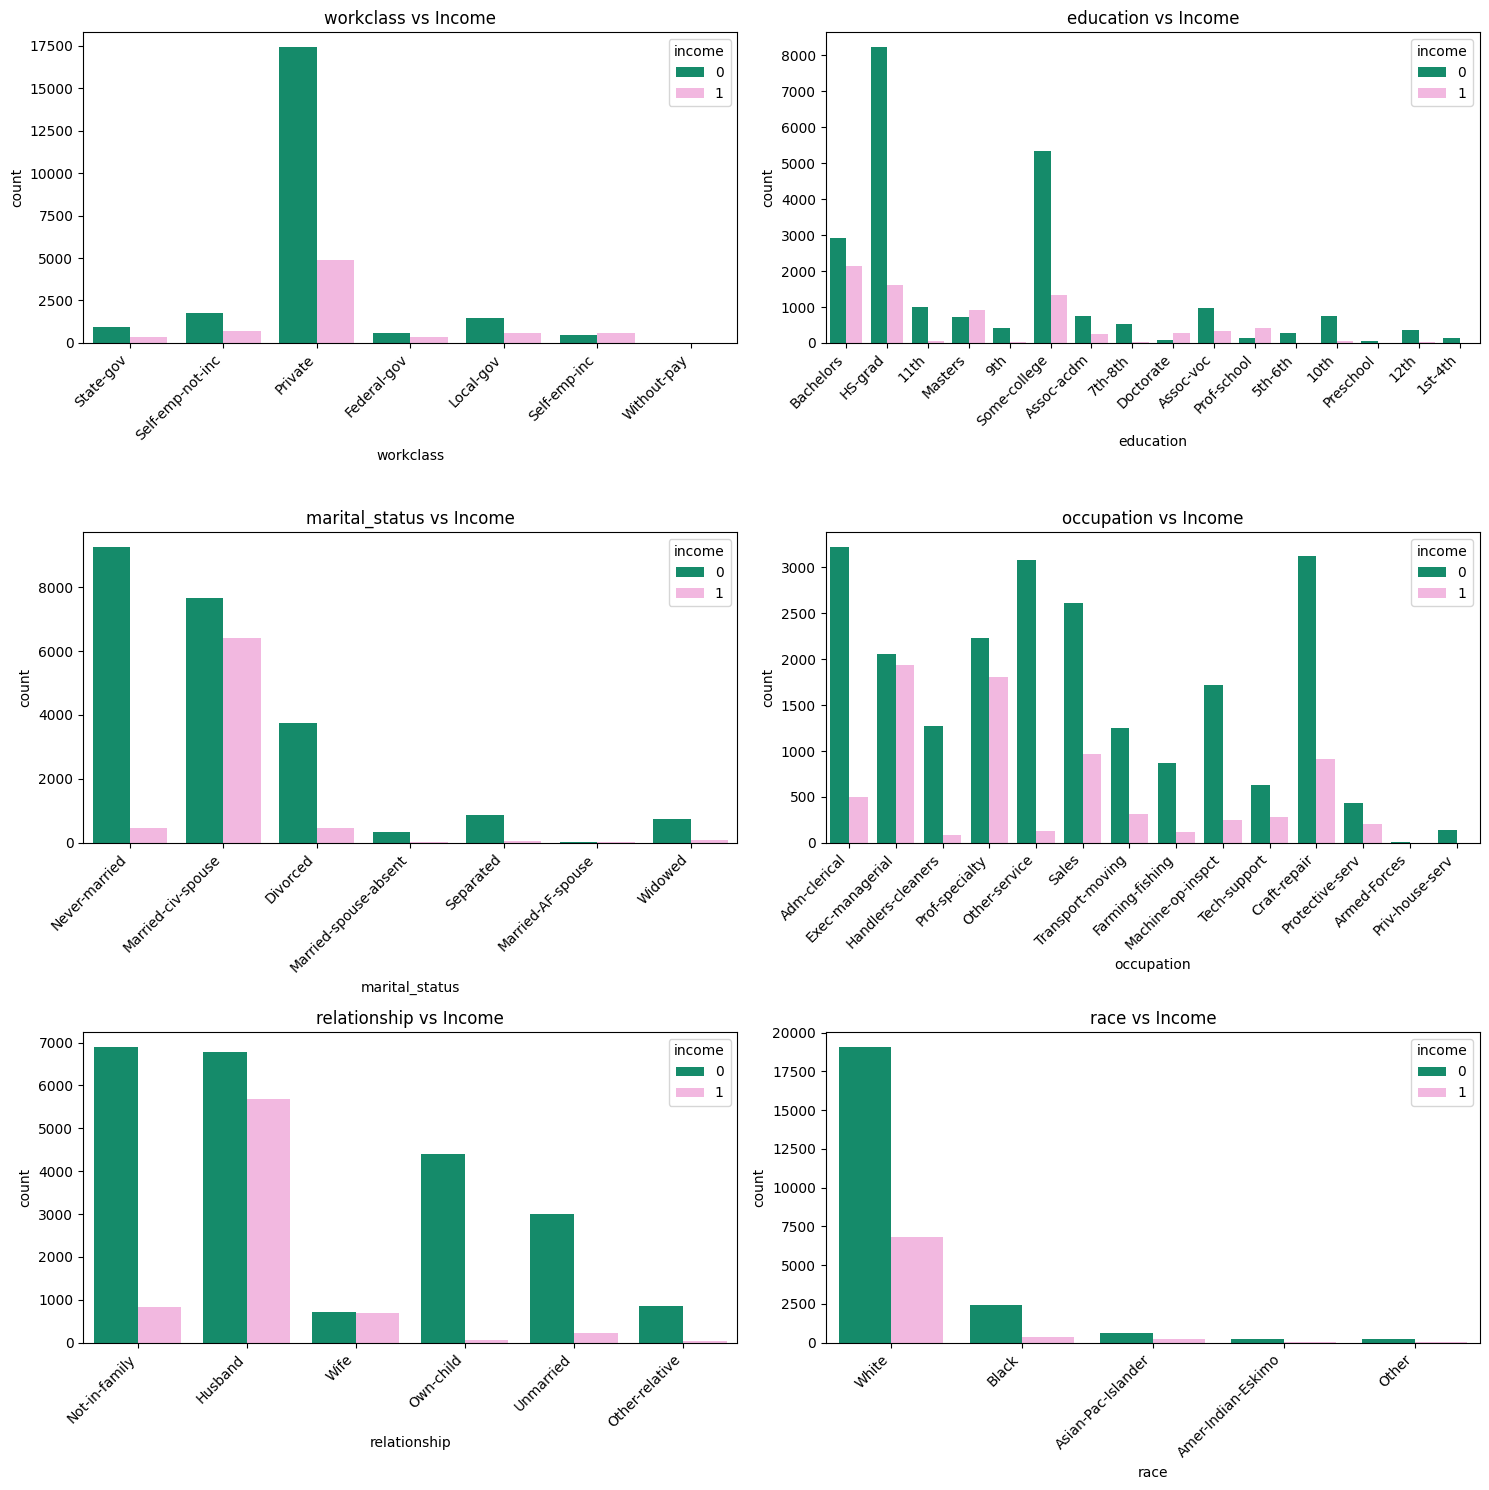

In [51]:
# List of categorical columns to plot
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation',
                       'relationship', 'race']

# Set the number of columns per row (2 graphs per row)
n_cols = 2

# Calculate the number of rows required (rounding up to fit all graphs)
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

# Set the size of the plots
plt.figure(figsize=(15, 5 * n_rows))  # Adjust height dynamically based on the number of rows

# Generate the colorblind-friendly palette
colorblind_palette = sns.color_palette("colorblind")

# Choose specific colors from the palette
# For example, let's select the first two colors (you can change the indices to select other colors)
colors = [colorblind_palette[2], colorblind_palette[6]]  # The first two colors

# Create a subplot for each categorical column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a grid with 2 columns per row
    sns.countplot(data=df, x=column, hue='income', palette=colors)  # Use the selected colors
    plt.title(f'{column} vs Income')
    plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
    plt.tight_layout()

# Display the plots
plt.show()


Now let's dive into details.

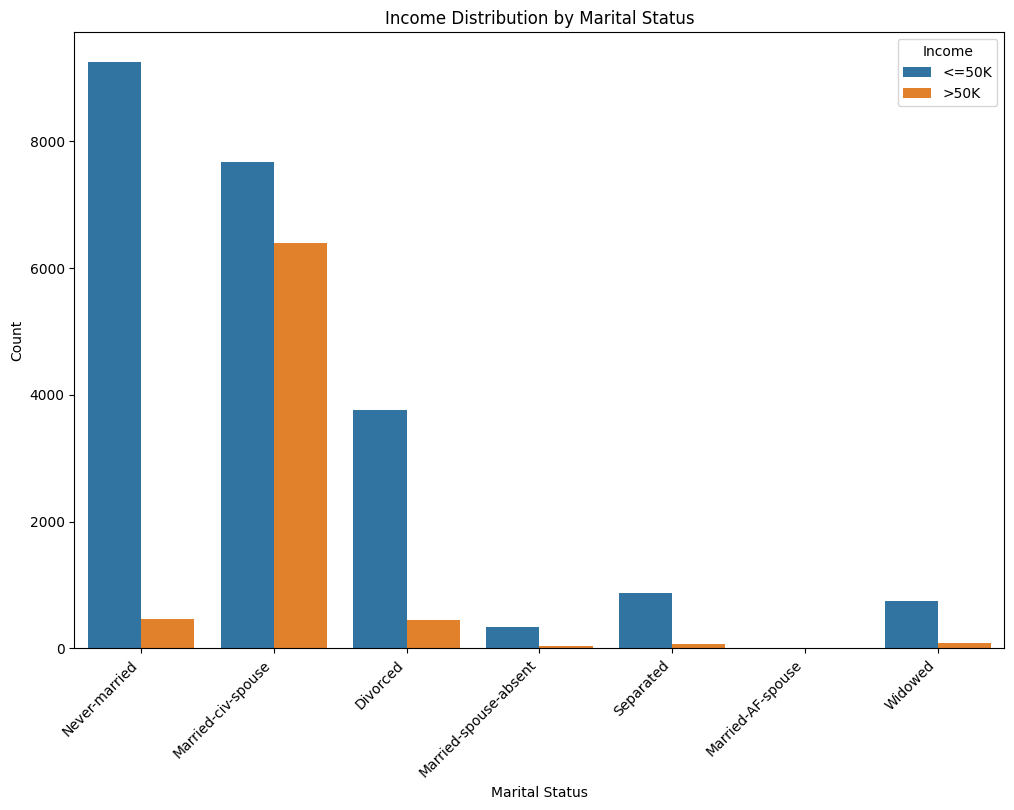

In [52]:
# Create a bar plot for income distribution by marital status
plt.figure(figsize=(12, 8))
sns.countplot(x='marital_status', hue='income', data=df)
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])
plt.show()

The plot suggests that marital status may be linked to income levels, with individuals categorized as "Married-civ-spouse" being more likely to have higher incomes, while those categorized as "Never-married" are more commonly found in the lower income bracket.

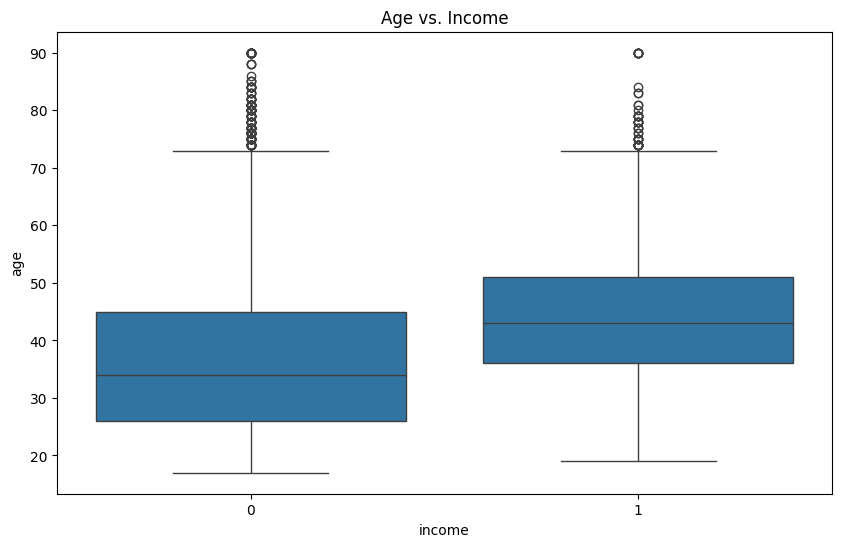

In [53]:
# Age and Income
plt.figure(figsize=(10, 6))
sns.boxplot(x="income", y="age", data=df)
plt.title("Age vs. Income")
plt.show()

The plot clearly shows that, on average, older individuals tend to earn higher incomes, as indicated by the higher position of the box for the ">50K" income category. It also reveals the presence of outliers, representing individuals with incomes that deviate substantially from the median. This visualization effectively summarizes the relationship between age and income, offering valuable insights into the dataset's income distribution.

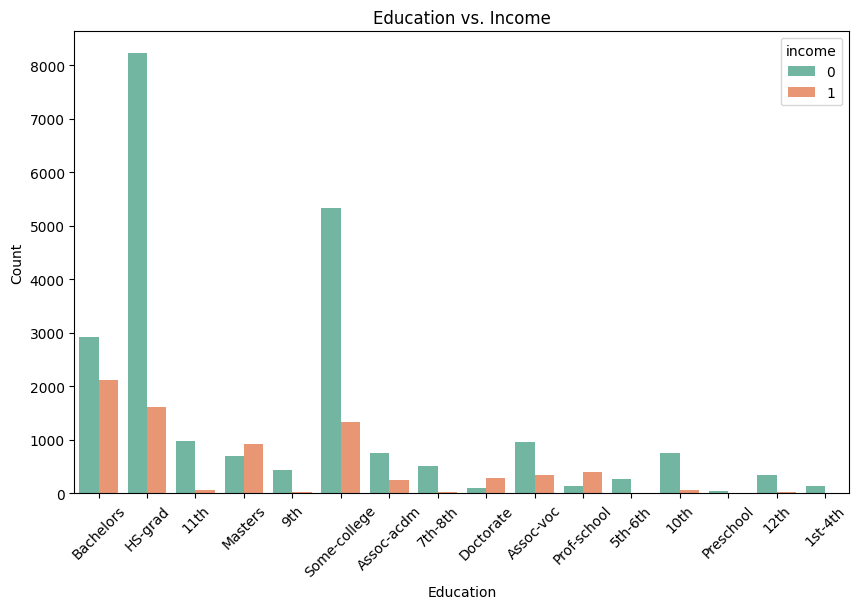

In [54]:
# Education and Income
plt.figure(figsize=(10, 6))
sns.countplot(x="education", hue="income", data=df, palette="Set2")
plt.title("Education vs. Income")
plt.xticks(rotation=45)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

It is clear that individuals with higher education levels, such as a bachelor's degree or above, are more likely to earn ">50K," demonstrating a positive correlation between education and income, as confirmed numerically through the "education_num" column.

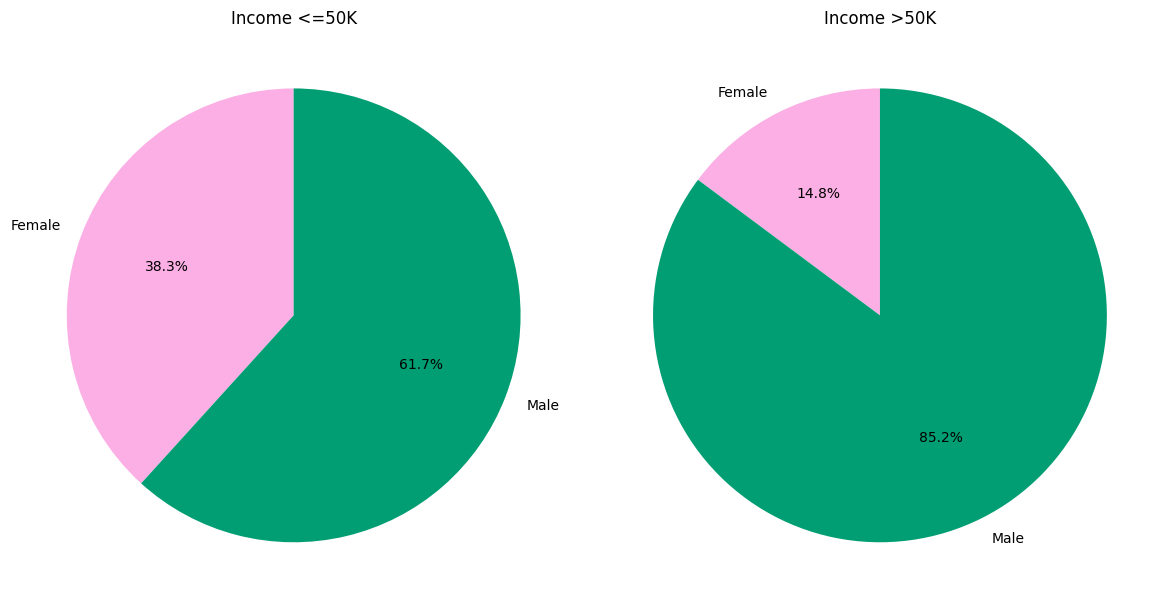

In [60]:
income_gender_counts = df.groupby(['income', 'sex']).size().unstack().fillna(0)

# Set up the plot
plt.figure(figsize=(12, 6))

#plt.ylabel('Distribution of Sex Vs Income')

# Pie chart for income category <=50K
plt.subplot(1, 2, 1)  # First plot

# Get the data for income <=50K as a Series
income_data = income_gender_counts.loc[0]

# Now plot the pie chart using the Series
income_data.plot.pie(autopct='%1.1f%%', startangle=90,
                    colors=[colorblind_palette[6], colorblind_palette[2]],
                    labels=['Female', 'Male'],
                    title='Income <=50K')
plt.ylabel('')

# Pie chart for income category >50K
plt.subplot(1, 2, 2)  # Second plot

# Get the data for income >50K as a Series
income_data = income_gender_counts.loc[1]

# Now plot the pie chart using the Series
income_data.plot.pie(autopct='%1.1f%%', startangle=90,
                    colors=[colorblind_palette[6], colorblind_palette[2]],
                    labels=['Female', 'Male'],
                    title='Income >50K')
plt.ylabel('')  # Remove ylabel for aesthetics

# Adjust layout for better spacing between the plots
plt.tight_layout()

# Display the plots
plt.show()

It can be seen from the plot that there are more males in higher income category.

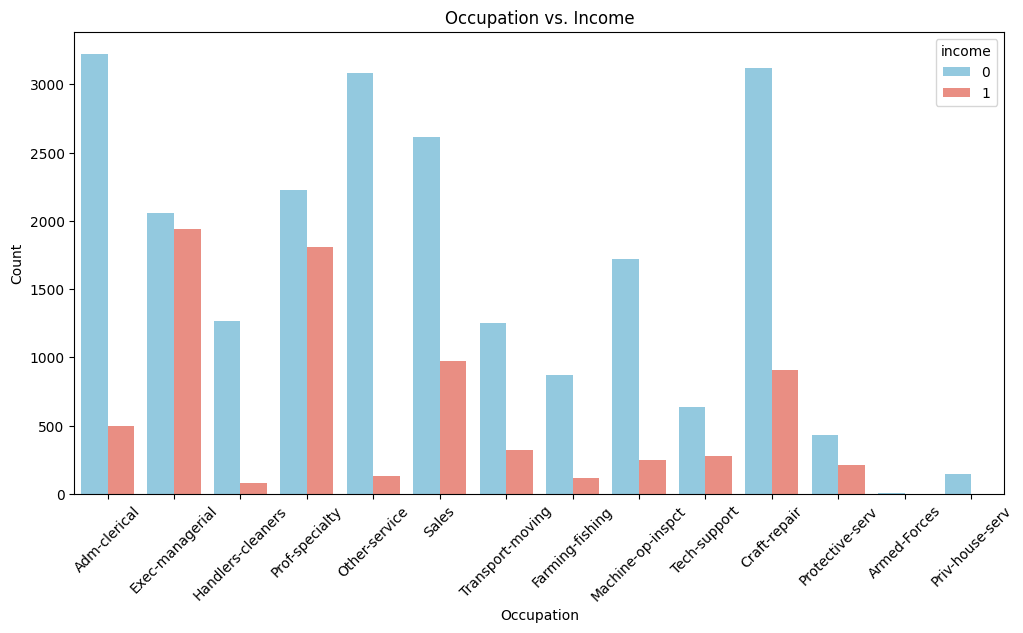

In [62]:
# Occupation and Income
# Define a custom color palette
custom_palette = {0: "skyblue", 1: "salmon"}

# Occupation and Income
plt.figure(figsize=(12, 6))
sns.countplot(x="occupation", hue="income", data=df, palette=custom_palette)
plt.title("Occupation vs. Income")
plt.xticks(rotation=45)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

Notably, occupations like "Exec-managerial" and "Prof-specialty" show a higher proportion of individuals earning ">50K," suggesting that occupation may significantly impact income levels.

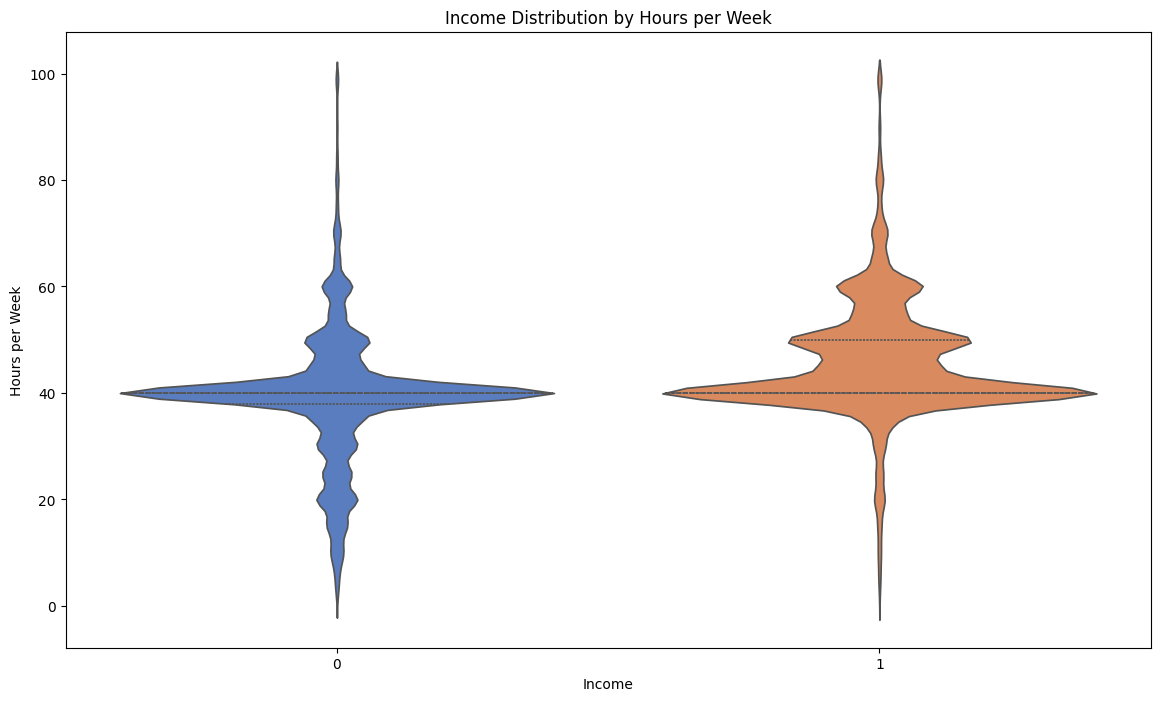

In [63]:
# Create a violin plot for income distribution by hours per week
warnings.filterwarnings("ignore")

plt.figure(figsize=(14, 8))
sns.violinplot(x='income', y='hours_per_week', data=df, inner="quartile", palette="muted")
plt.title('Income Distribution by Hours per Week')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

Although individuals with higher incomes tend to work more hours per week, the overlap and variability in the distributions highlight the need to consider additional factors when predicting income.

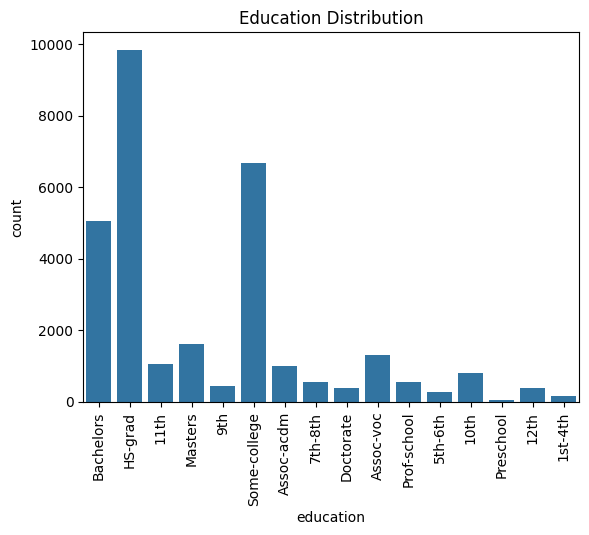

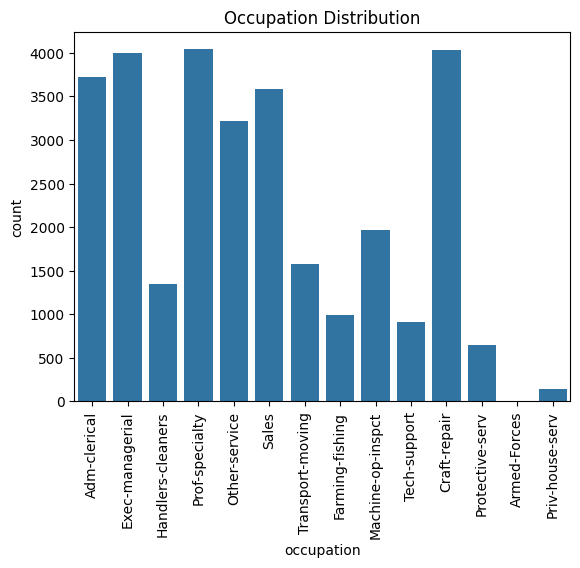

In [64]:
#Understanting the distribution of individuals across different education levels and occupations in your dataset.
sns.countplot(x="education", data=df)
plt.title("Education Distribution")
plt.xticks(rotation=90)
plt.show()

sns.countplot(x="occupation", data=df)
plt.title("Occupation Distribution")
plt.xticks(rotation=90)
plt.show()


In [65]:

# Save DataFrame to CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Visualization/adults.csv', index=False)

In conclusion, based on our observations, we have selected the following features: `"age"`, `"sex"`, `"education"`, `"occupation"`, `"marital_status"`, and `"native_country"` as the demographic attributes to explain the `"income"` column. These chosen features are considered relevant for gaining insights into the income distribution within the dataset.